<a href="https://colab.research.google.com/github/niehues/pca_intro/blob/master/Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to basic visualizations of multidimensional data


In [0]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing

In [8]:
# load the example data set
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
data = datasets.load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [9]:
# convert to pandas data frame
df = pd.DataFrame(data.data, columns = data.feature_names)
print(df)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


In [10]:
# create array with class values
classes = np.array([data.target_names[0] if _ == 0 else data.target_names[1] 
                    for _ in data.target])
print(classes[1:13])

['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant']


<Figure size 432x288 with 0 Axes>

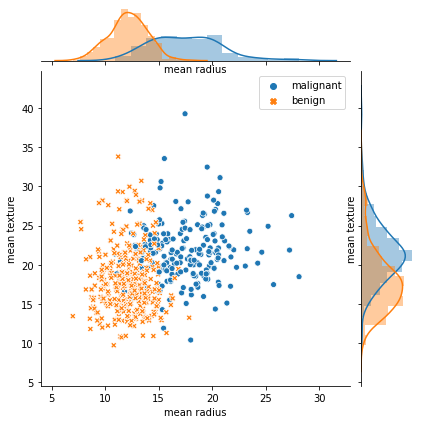

In [11]:
x, y = "mean radius", "mean texture"
# plot histogram of individual features
import matplotlib.pyplot as plt
import seaborn as sns
# new plot
plt.figure()
jointplot_2d = sns.JointGrid(x = x, y = y, data = df)
# scatter plot
jointplot_2d = jointplot_2d.plot_joint(
    sns.scatterplot, hue = classes, style = classes)
# plot distributions
for _ in (0, 1):
  sns.distplot(df.loc[data.target == _, x], ax = jointplot_2d.ax_marg_x)
  sns.distplot(df.loc[data.target == _, y], ax = jointplot_2d.ax_marg_y, 
               vertical = True)
plt.show()


Plot different features against each other by chaning x and y in the above code. Which features seem to be correlated?

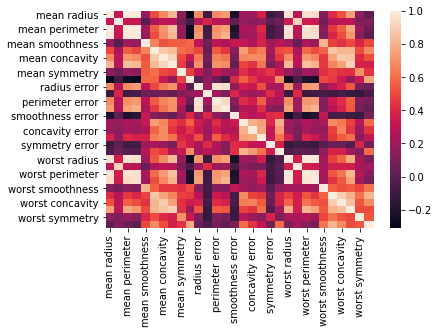

In [12]:
# feature correlation heatmap
plt.figure()
sns.heatmap(df.corr())
plt.show()

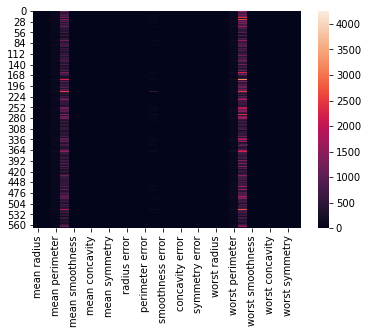

In [13]:
# plot heatmap
fig, ax = plt.subplots()
sns.heatmap(df)

The measured features have very different scales.

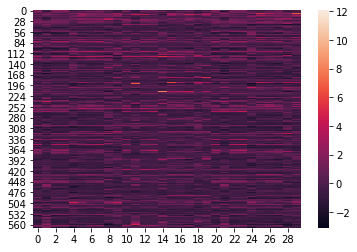

In [14]:
# normalize data (mean centering and scaling to unit-variance)
scaler = preprocessing.StandardScaler(with_mean = True, with_std = True)
df_normalized = scaler.fit_transform(df)
fig, ax = plt.subplots()
sns.heatmap(df_normalized)

Explained variance: [0.95093623 0.04906377]


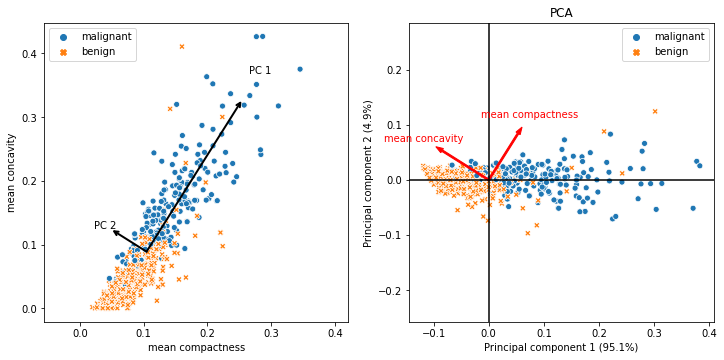

In [15]:
# PCA with two variables only
from sklearn import decomposition
fig, axes = plt.subplots(1, 2, figsize = (12, 5.5))
x, y = "mean compactness", "mean concavity"
#x, y = "mean radius", "mean perimeter"
# scatterplot of two features
sns.scatterplot(
    x = x,
    y = y,
    data = df,
    hue = classes, style = classes,
    ax = axes[0])
# PCA of two features
pca = decomposition.PCA(n_components = 2)
transformed = pca.fit_transform(df.loc[:,(x,y)]) # two columns only
# variance explained by principal components
print("Explained variance:", pca.explained_variance_ratio_)
sns.scatterplot(
    x = transformed[:,0], # PC1 
    y = transformed[:,1], # PC2
    hue = classes, style = classes,
    ax = axes[1])
axes[1].set_xlabel(
    "Principal component 1 ({0:.1%})".format(pca.explained_variance_ratio_[0]))
axes[1].set_ylabel(
    "Principal component 2 ({0:.1%})".format(pca.explained_variance_ratio_[1]))
axes[1].set_title("PCA")
# add PCs to scatterplot
for pc, label in enumerate(("PC 1", "PC 2")):
    axes[0].annotate(
        "", 
        xy = pca.mean_, 
        xytext = pca.mean_ + 3*pca.components_[pc] * np.sqrt(pca.explained_variance_[pc]),
        arrowprops = {"arrowstyle": "<-", 
                      "linewidth": 2, 
                      "shrinkA": 0, 
                      "shrinkB": 0})
    axes[0].text(
        *(pca.mean_ + 3.6*pca.components_[pc] * np.sqrt(pca.explained_variance_[pc])),
        label, color = "k", ha = "center", va = "center")
axes[1].axvline(0, c = "k")
axes[1].axhline(0, c = "k")
for idx, var in enumerate((x, y)):
    axes[1].arrow(
        0, 0, 0.1*pca.components_[idx, 0], 0.1*pca.components_[idx, 1], 
        color = "r", linewidth = 1, width = 0.003)
    axes[1].text(
        0.14*pca.components_[idx, 0], 0.14*pca.components_[idx, 1],
        var, color = "r", ha = "center", va = "center")
# set equal dimensions for x and y axis
axes[0].axis("equal")
axes[1].axis("equal")
plt.show()

In [16]:
pca.components_

array([[ 0.53272836,  0.8462863 ],
       [-0.8462863 ,  0.53272836]])

Raw data - explained variance: [0.98204467 0.01617649 0.00155751]
Normalized data - explained variance: [0.44272026 0.18971182 0.09393163]


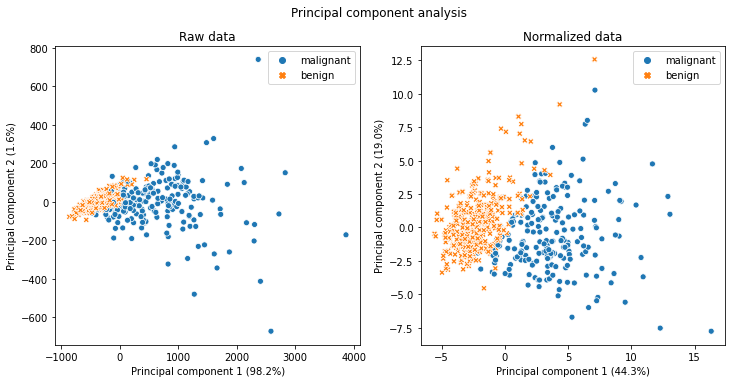

In [17]:
# PCA
from sklearn import decomposition
fig, axes = plt.subplots(1, 2, figsize = (12, 5.5))
for _df, ax, title in ((df, 0, "Raw data"), 
                       (df_normalized, 1, "Normalized data")):
    pca = decomposition.PCA(n_components = 3)
    transformed = pca.fit_transform(_df)
    # variance explained by principal components
    print(title, "- explained variance:", pca.explained_variance_ratio_)
    sns.scatterplot(
        x = transformed[:,0], # PC1 
        y = transformed[:,1], # PC2
        hue = classes, style = classes,
        ax = axes[ax])
    axes[ax].set_xlabel(
        "Principal component 1 ({0:.1%})".format(pca.explained_variance_ratio_[0]))
    axes[ax].set_ylabel(
        "Principal component 2 ({0:.1%})".format(pca.explained_variance_ratio_[1]))
    axes[ax].set_title(title)
plt.suptitle("Principal component analysis")
plt.show()


In [18]:
# t-SNE
from sklearn import manifold
tsne = manifold.TSNE(n_components = 2, verbose = 1)
df_tsne = tsne.fit_transform(df_normalized)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.002s...
[t-SNE] Computed neighbors for 569 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.414330
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.774704
[t-SNE] KL divergence after 1000 iterations: 0.996816


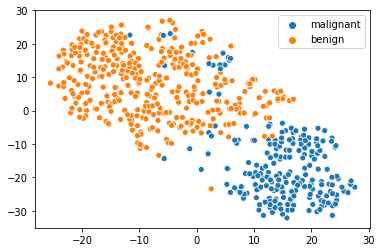

In [19]:
plt.figure()
sns.scatterplot(
    x = df_tsne[:,0], y = df_tsne[:,1],
    hue = classes
)